In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import os

os.chdir('/content/drive/MyDrive/NIA 폐플라스틱 객체 검출 예측/Data')
cv.__version__

'4.1.2'

In [74]:
!ls

download.zip  PET.zip  PE.zip  PP.zip  PS.zip  Test  Train


In [75]:
def apply_mask(image, mask, color, alpha = 0.5):

  for c in range(3):

    image[:, :, c] = np.where(mask == 1,
                              image[:,:,c] * (1 - alpha) + alpha * color[c] * 255, image[:,:,c])
    
  return image

In [77]:
# import json
# with open('/content/drive/MyDrive/NIA 폐플라스틱 객체 검출 예측/Data/Train/annotation/PE/PE_074_10.json','r') as f:
#   data = json.loads(f.read())

# print(data)

In [78]:
def cvColor():
  # R, G, B
  BLACK = (0, 0, 0)
  WHITE = (255, 255, 255)
  GRAY = (125, 125, 125)
  RED = (255, 0, 0)
  GREEN = (0, 255, 0)
  BLUE = (0, 0, 255)
  CYAN = (0, 255, 255)
  MAGENTA = (255, 0, 255)
  YELLOW = (255, 255, 0)
  PINK = (238, 130, 238)
  ORANGE = (255, 165, 0)
  MINT = (60, 179, 113)
  LAVENDER = (106, 90, 205)
  IVORY = (240, 240, 240)
  SALMON = (240, 150, 120)
  colors = {"RED":RED, "GREEN":GREEN, "BLUE":BLUE, \
          "MAGENTA":MAGENTA, "CYAN":CYAN, "YELLOW":YELLOW, \
          "WHITE":WHITE, "GRAY":GRAY, "BLACK":BLACK, \
          "PINK":PINK, "ORANGE":ORANGE, "MINT":MINT, \
          "LAVENDER":LAVENDER, "IVORY":IVORY, "SALMON":SALMON}
  return colors

colors = cvColor()

TypeError: ignored

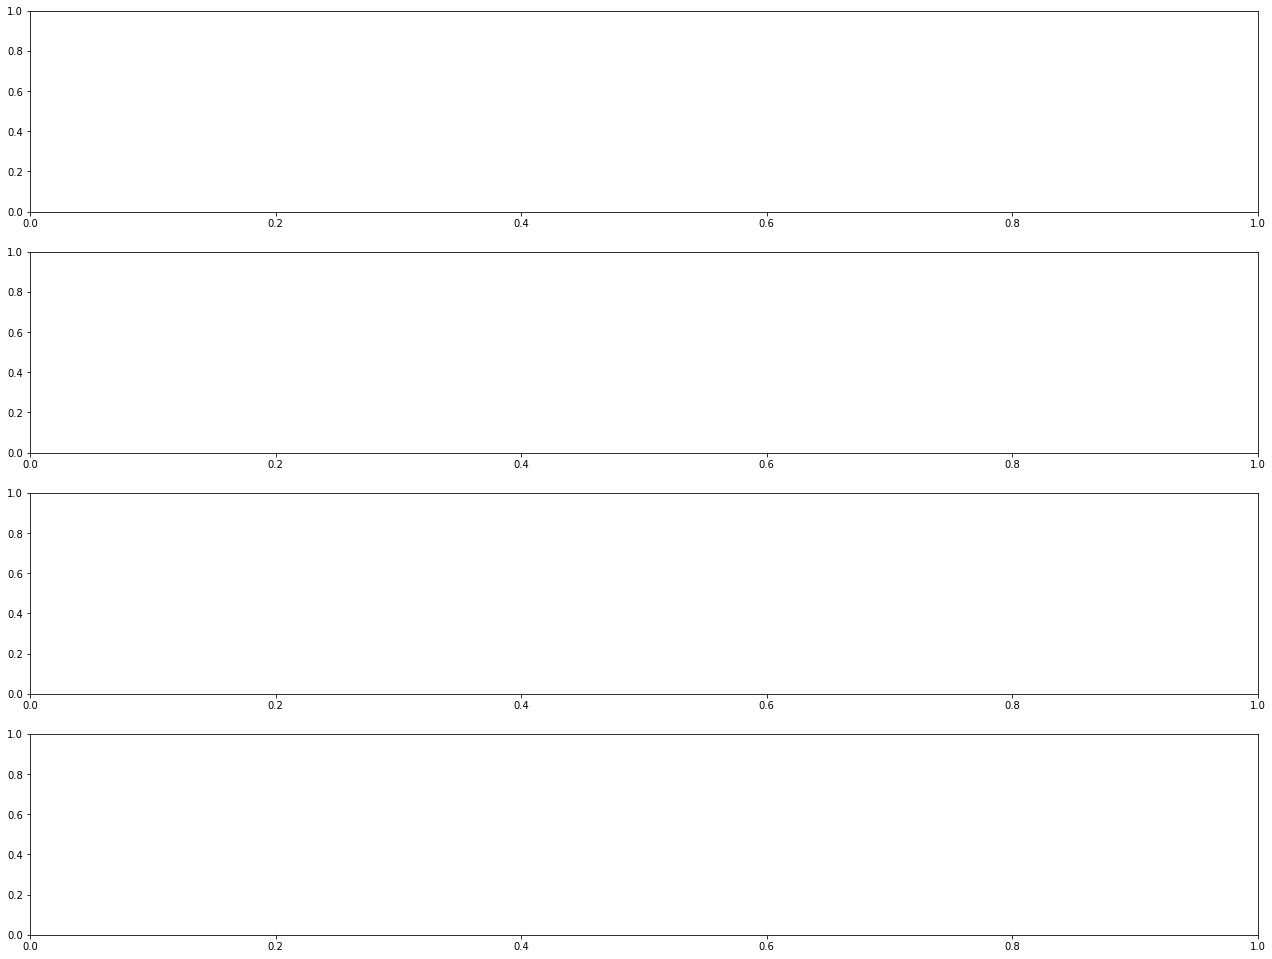

In [79]:
from PIL import Image
import random
from glob import glob
from matplotlib import patches,  lines
from matplotlib.patches import Polygon

PATH = 'Train/annotation'

# 4개의 directory에서 하나씩 뽑아서 샘플을 가지고 segmentation 확인하기
dir_list = ['PE','PET','PP','PS']

_, ax = plt.subplots(4, figsize = (22, 17))

color = {k:i for k,i in enumerate(colors.keys)}

for i in dir_list:
  
  # 각 directory의 annottation에서 json파일을 가져온다.
  data = glob(PATH + '/' + i + '/' + '*.json')
  
  # json중 하나만 뽑아서 가져온다.
  json_data = random.choice(data)
  
  # json 파일을 열어서 annot에 저장한다.
  with open(json_data, 'r') as f:
    annot = json.loads(f.read())

  # image의 이름을 가져온다.
  image_name = annot['images'][0]['file_name']

  # image를 연다.
  image = Image.open('Train' + '/' + i + '/' + image_name)

  # 이미지를 넘파이 형태로 저장한다.
  image = np.array(image)
  
  # 이미지와 똑같은 사이즈로 만들기 위해서 mask도 copy한다.
  masked_image = image.copy()

  # object의 구조상 몇 개의 사물이 관측될지 모르기 때문에 annot의 annotations의 개수를 가져온다.
  for j in range(len(annot['annotations'])):

    # annotation에서 각 번호에 맞는 segmentation을 가져온다.
    segmentation = annot['annotations'][j]['segmentation']

    # annotation에서 각 번호에 맞는 bbox를 가져온다.
    bbox = annot['annotations'][j]['bbox']

    label = annot['annotations'][j]['category_id']

    xmin, ymin, width, height = bbox[0],bbox[1],bbox[2],bbox[3]
    cv.rectangle(image, (xmin, ymin), (xmin + width, ymin + height),colors[color[j]],4)
    
    for k in range(3):

      masked_image[:,:,k] = np.where(segmentation == 1, image[:,:,k]*0.5 + 0.5*255*255, image[:,:,k])

    plt.imshow(masked_image)
  plt.imshow(image)
  plt.show()

## 추가적으로 봐야할 부분

Segmentation을 이미지로 어떻게 나타낼 것인가?

- 그 부분에서 에러가 난 부분이니 해결해야한다.

bbox부분의 색을 바꿔가며 어떻게 진행을 해야하는 것인가?

Class로 구현한다면 나중에 사용할 수 있기 때문에 나중에 다시 구현하도록 하자!!